In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [4]:
tips['smoker_bin'] = tips['smoker'].map({
    'Yes': 1,
    'No' : 0}
)

tips['sex_bin'] = tips['sex'].map({
    'Male': 1,
    'Female' : 0}
)

tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,smoker_bin,sex_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1


In [5]:
#X = tips[['smoker_bin']] # 0101011101110101
y = tips['tip'] # continuous

X = tips[['total_bill']] 
y = tips['sex_bin'] 
#y = tips['smoker_bin']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.2)

In [8]:
model_gnb = GaussianNB() 

model_gnb.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [11]:
y_pred_gnb = model_gnb.predict(X_test)
cr_gnb = classification_report(y_test,y_pred_gnb)

print(cr_gnb)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.61      1.00      0.76        30

    accuracy                           0.61        49
   macro avg       0.31      0.50      0.38        49
weighted avg       0.37      0.61      0.46        49



/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [23]:
gnb = confusion_matrix(y_test, y_pred_gnb)

<Axes: >

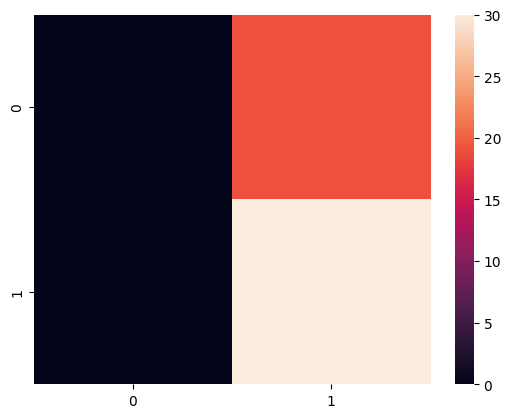

In [24]:
sns.heatmap(gnb)